In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special
from scipy.special import loggamma

### Exempel 9.1 (Simulera $V^3$)

In [2]:
V = stats.t(6, loc=4.68, scale=np.sqrt(0.31))

In [3]:
k = 100000

In [4]:
vs = V.rvs(k)
h_vs = vs ** 3
h_k = np.mean(h_vs)
error_k = np.sqrt(np.mean((h_vs - h_k) ** 2) / k)
print(f"{k}, {h_k}, {error_k}")

100000, 109.10595508739259, 0.16111151721460581


In [5]:
vs = V.rvs(k)
h_vs = (vs ** 3 > 100).astype(np.float64)
h_k = np.mean(h_vs)
error_k = np.sqrt(np.mean((h_vs - h_k) ** 2) / k)
print(f"{k}, {h_k}, {error_k}")

100000, 0.52571, 0.0015790471680732021


In [6]:
k = 1000000
vs = V.rvs(k)
vs_sorted = sorted(vs ** 3)
a = vs_sorted[int(0.025 * k)]
b = vs_sorted[-int(0.025 * k)]
print(f"{k}, {a}, {b}")

1000000, 36.53906032733135, 220.44995057889875


### Exempel 9.2 och 9.3 (Förkastelsemetoden med likaformigkandidat)

Vi implementera algoritmen så att vi får ut lite mer än bara ett utfall.  Nämligen ger implementeringen nedan ett utfall, alla kandidat för utfall (v värdena) och en lista tripplar värdena $[u,v,(1/m)f_X(v)]$ för varje iterering:

In [ ]:
for index, row in all_runs_df.iterrows():
    samps = np.array(row['runs'])
    alpha_beta = Gauss_Raphson_method(samps)
    
    all_runs_df.at[index, 'alpha_run'] = round(alpha_beta[0],2)
    all_runs_df.at[index, 'beta_run'] = round(alpha_beta[1],2)

print(all_runs_df[['id', 'alpha_run', 'beta_run']])

results_df['alpha_run'] = all_runs_df['alpha_run']
results_df['beta_run'] = all_runs_df['beta_run']

In [7]:
#V ~ U(a,b) och mål är målfördelningens täthetsfunktion:
def rejection_uni(a, b, m, mål):
    y = 0
    
    iterations = []
    
    analysis = []
    
    while y == 0:
        v = stats.uniform.rvs(size = 1, loc = a, scale = b)
        u = stats.uniform.rvs(size = 1, loc = 0, scale = 1)
        
        iterations += [v]
        analysis += [[u[0], v[0], (1/m)*np.apply_along_axis(mål, 0, v)[0]]]
        
        if u < (1/m)*np.apply_along_axis(mål, 0, v):
            x = v
            y = 1

    return x, iterations, analysis

Vi skulle vilja ta ett slumpmässigt utfall från en $\textrm{Beta}(2.7,3.6)$-fördelning vilket har täthetsfunktion:

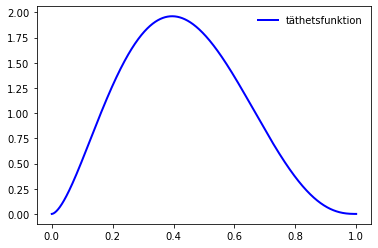

In [8]:
pdf = stats.beta(a = 2.7, b = 3.6)

fig, ax = plt.subplots(1,1)
x = np.linspace(0.0001, 0.9999, 1000)
ax.plot(x, pdf.pdf(x), 'k-', lw=2, label='täthetsfunktion', color = 'blue')

ax.legend(loc='best', frameon=False)

# plt.savefig("beta_2.7_3.6.pdf", bbox_inches='tight')
plt.show()

Vi ser i figuren ovan att vi kan ta $m = 2$. Vi definierar först en funktion för täthetsfunktionen för $\textrm{Beta}(2.7,3.6)$:

In [9]:
def mål_tät(x):
    return stats.beta.pdf(x, a = 2.7, b = 3.6)

Vi generera ett slumpmässigt utfall:

In [10]:
samp = rejection_uni(0, 1, 2, mål_tät)

#utfallet
utfall = samp[0][0]
print(f"{utfall=}")

#antalet itereringar:
num_iter = len(samp[1])
print(f"{num_iter=}")

utfall=0.15250512240793568
num_iter=3


In [11]:
# Analys:
column_names = ['u', 'v', 'f_X(v)/m']

df = pd.DataFrame(data = samp[2], 
                  columns = column_names)

df.head()

,u,v,f_X(v)/m
0,0.332352,0.747607,0.298902
1,0.700566,0.808258,0.167026
2,0.241191,0.152505,0.467331


Algoritmen behövde bara tre iterationer innan det hittade ett utfall. 

Vi ser att vi behöva $m = 2$ iterationer i förväntan:

In [12]:
num_iter = []

for i in range(2000):
    samp = rejection_uni(0, 1, 2, mål_tät)
    num_iter += [len(samp[1])]
    
average_num_iterations = np.mean(num_iter)
print(f"{average_num_iterations=}")

average_num_iterations=2.0445


Plottan av $f_X(x)$ och $g(x) = m = 2$:

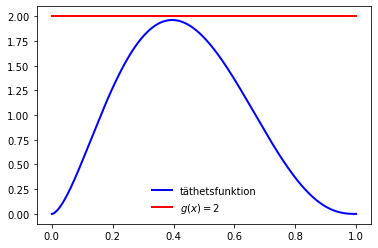

In [13]:
pdf = stats.beta(a = 2.7, b = 3.6)

def constant2(x):
    return 2

constant2 = np.vectorize(constant2)

fig, ax = plt.subplots(1,1)
x = np.linspace(0.0001, 0.9999, 1000)
ax.plot(x, pdf.pdf(x), 'k-', lw=2, label='täthetsfunktion', color = 'blue')
ax.plot(x, constant2(x), 'k-', lw=2, label='$g(x) = 2$', color = 'red')

ax.legend(loc='best', frameon=False)

# plt.savefig("beta_m_2.pdf", bbox_inches='tight')
plt.show()

Om vi ökar $m$ algoritmen naturligtvis behöver mer iterationer:

In [14]:
samp2 = rejection_uni(0, 1, 5, mål_tät)

#utfallet
utfall = samp2[0]
print(f"{utfall=}")

#antalet itereringar:
num_iter = len(samp2[1])
print(f"{num_iter=}")

utfall=array([0.47210712])
num_iter=6


Vi ser att vi behöva $m = 5$ iterationer i förväntan:

In [15]:
num_iter = []

for i in range(2000):
    samp = rejection_uni(0, 1, 5, mål_tät)
    num_iter += [len(samp[1])]

average_num_iterations = np.mean(num_iter)
print(f"{average_num_iterations=}")

average_num_iterations=4.9195


Plottan av $f_X(x)$ och $g(x) = m = 5$:

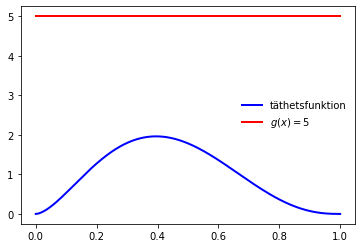

In [16]:
pdf = stats.beta(a = 2.7, b = 3.6)

def constant5(x):
    return 5

constant5 = np.vectorize(constant5)

fig, ax = plt.subplots(1,1)
x = np.linspace(0.0001, 0.9999, 1000)
ax.plot(x, pdf.pdf(x), 'k-', lw=2, label='täthetsfunktion', color = 'blue')
ax.plot(x, constant5(x), 'k-', lw=2, label='$g(x) = 5$', color = 'red')

ax.legend(loc='best', frameon=False)

# plt.savefig("beta_m_5.pdf", bbox_inches='tight')
plt.show()

### Exempel 9.4 (Förkastelsemetoden med betakandidat)

Om vi tar $g(z)$ att vara täthetsfunktionen för kandidatfördelningen $Z\sim\textrm{Beta}(2,3)$ kan vi beräkna för hand $\textrm{max}_{x\in [0,1]}\frac{f_X(x)}{g(x)}\approx 1.2$. Vi kan också approximera detta värde genom att utvärdera kvoten $f_X(x)/g(x)$ på ett finmaskigt rutnät och välja det storsta värdet:

In [17]:
fine_grid = np.linspace(0.001, 0.999, int(1e4))
m_est = np.max(stats.beta.pdf(fine_grid, a=2.7, b=3.6) / stats.beta.pdf(fine_grid, a=2, b=3))
print(f"{m_est=}")

m_est=1.194169539982844


Vi kan också approximera värdet med hjälp av plottan av kvoten (eftersom stödet är ändligt):

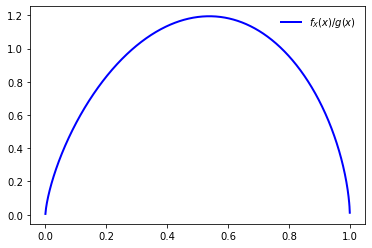

In [24]:
pdf = stats.beta(a = 2.7, b = 3.6)
pdf2 = stats.beta(a = 2, b = 3)

fig, ax = plt.subplots(1,1)
x = np.linspace(0.0001, 0.9999, 1000)
ax.plot(x, pdf.pdf(x)/pdf2.pdf(x), 'k-', lw=2, label='$f_X(x)/g(x)$', color = 'blue')
ax.legend(loc='best', frameon=False)

plt.show()

Följande figuren visar att $f_X(x) \leq mg(x)$ där $m = 1.2$ för alla $0 \leq x \leq 1$:

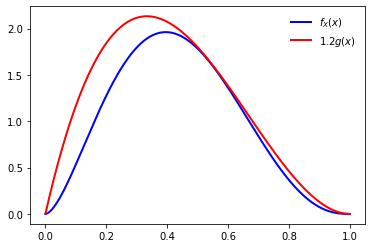

In [18]:
pdf = stats.beta(a = 2.7, b = 3.6)
pdf2 = stats.beta(a = 2, b = 3)

fig, ax = plt.subplots(1,1)
x = np.linspace(0.0001, 0.9999, 1000)
ax.plot(x, pdf.pdf(x), 'k-', lw=2, label='$f_X(x)$', color = 'blue')
ax.plot(x, 1.2*pdf2.pdf(x), 'k-', lw=2, label='$1.2g(x)$', color = 'red')

ax.legend(loc='best', frameon=False)

# plt.savefig("rejection_beta_2_2_kandidat.pdf", bbox_inches='tight')
plt.show()

In [19]:
def kandidat_tät(x):
    return stats.beta.pdf(x, a = 2, b = 3)

In [20]:
#mål är målfördelningens täthetsfunktion, kandidat är kandidatfördelningens täthetsfunktion:
def rejection(m, mål, kandidat):
    y = 0
    
    iterations = []
    
    while y == 0:
        v = stats.beta.rvs(size = 1,a = 2, b = 3) #generera utfall från beta(2,3) (kandidatfördelningen)
        u = stats.uniform.rvs(size = 1, loc = 0, scale = 1)
        iterations += [v]
        
        if u*m*(np.apply_along_axis(kandidat, 0, v)[0]) <= (np.apply_along_axis(mål, 0, v)[0]):
            x = v
            y = 1

    return x, iterations

In [21]:
samp3 = rejection(1.2, mål_tät, kandidat_tät)

#utfallet
utfall = samp3[0][0]
print(f"{utfall=}")

#antalet itereringar:
num_iter = len(samp3[1])
print(f"{num_iter=}")

utfall=0.5261552044068735
num_iter=1


In [22]:
num_iter = []

for i in range(2000):
    samp = rejection(1.2, mål_tät, kandidat_tät)
    num_iter += [len(samp[1])]
    
average_num_iterations = np.mean(num_iter)
print(f"{average_num_iterations=}")

average_num_iterations=1.216


### Exempel 9.5 (Förkastelsemetoden för simulering med icke-konjugerad apriorifördelning)

Antag att vi har normalfördelad data där vi har t-fördelningen som apriorifördelning.

$$
\begin{split}
X | \Theta = \theta &\sim \mathrm{N}(\theta, 0.8^2)\\
\Theta &\sim t(4, 2, 0.3)
\end{split}
$$

Då är apriorifördelningen inte konjugat och vi kan inte beräkna aposteriorifördelningen enkelt. Vi använder istället numeriska metoder för att generera utfall.

In [33]:
# Parameters used for data generation
θ_true = 0.4
σ = 0.8

n_data = int(50)

# Fix the seed when generating the data so that we get the sama data
# points in each run. This makes it easier to compare.
data = stats.norm.rvs(size=n_data, loc=θ_true, scale=σ, random_state=0)

In [34]:
# Set up prior.

# Mean and standard deviation.
mu_0 = 2
tau_0 = 0.3

def normal_prior(θ):
    return stats.norm.pdf(θ, loc=mu_0, scale=tau_0)

def t_prior(θ):
    return stats.t.pdf(θ, df=4, loc=mu_0, scale=tau_0)

prior = t_prior

In [35]:
# Set up likelihood and posterior.

# Sometimes better to work with log-pdfs numerically to avoid underflow
# (values too small to represent properly). Note that we exponentiate here
# to get regular densities at the end. This means that we can still run into
# underflow issues when the likelihood and prior have very little overlap.
# In general, it is safer to carry out as many of the computations as possible
# in the log domain, but we will not do this here for the sake of clarity.
def likelihood(xs, θ):
    # We will want to call the likelihood function where both xs and θ are
    # arrays. For example, we may have n data points x and k parameters θ and
    # would like to calculate the likelihood of the data for each of these k
    # parameters. This can be done with a loop, but is very inefficient. Instead,
    # we can use NumPy's powerful broadcasting rules and reshape the xs array into
    # an n × 1 array and the θ array into a 1 × k array. When we call the logpdf
    # (or pdf) function, the result will be an n × k array that we can sum along
    # the first axis to get k log-likelihoods.
    
    # Add an axis of length one to xs.
    xs = xs[:, np.newaxis]
    
    # If θ is not an array, make it into one (with at least one dimension), then
    # add an axis of length one.
    θ = np.atleast_1d(θ)
    θ = θ[np.newaxis, :]
    
    # Log-likelihood is obtained by summing along the sample (first) axis.
    log_likelihood = np.sum(stats.norm.logpdf(xs, loc=θ, scale=σ), axis=0)
    
    return np.exp(log_likelihood)

def posterior(θ):
    return likelihood(data, θ) * prior(θ)

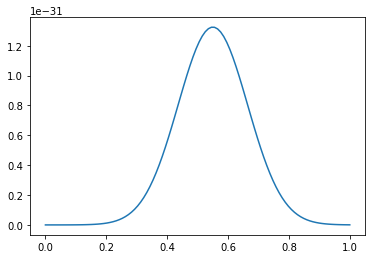

In [36]:
# Plot the posterior to get an idea.
grid = np.linspace(0, 1, 100)

plt.plot(grid, posterior(grid))

# plt.savefig("t_posterior_rejection.pdf", bbox_inches='tight')
plt.show()

In [37]:
# Use Cauchy as candidate distribution. Can do better here by finding a
# distribution that more closely approximates the posterior.
def candidate(θ):
    return stats.cauchy.pdf(θ)

# We don't know the proper m here, so estimate it. Hope that it is between
# –5 and 5 and that our grid is fine enough (it is). Ideally, this should be
# calculated analytically or using a numerical optimization function.
fine_grid = np.linspace(-5, 5, int(1e4))
m_est = np.max(posterior(fine_grid) / candidate(fine_grid))

# Generate some samples using accept–reject.
k = int(1e3)

θs = np.zeros(k)

for i in range(k):
    u = stats.uniform.rvs()
    v = stats.cauchy.rvs()
    while u > posterior(v) / (m_est * candidate(v)):
        u = stats.uniform.rvs()
        v = stats.cauchy.rvs()
    θs[i] = v

est_constant=3.790359672318646e-32


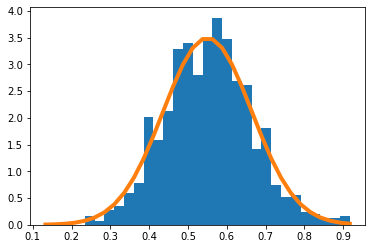

In [43]:
# Plot the histogram and compare to pdf.

grid = np.linspace(np.min(θs), np.max(θs), 32)

# Estimate normalizing constant for display purposes. This is essentially
# a Riemann sum with the spacing given by the grid.
spacing = grid[1] - grid[0]
est_constant = spacing * np.sum(posterior(grid))

print(f"{est_constant=}")

plt.hist(θs, grid, density=True)
plt.plot(grid, posterior(grid) / est_constant, linewidth=4)

# plt.savefig("t_posterior_rejection_hist.pdf", bbox_inches='tight')
plt.show()

In [44]:
# Check the posterior mean and std.
posterior_mean, posterior_std = np.mean(θs), np.std(θs, ddof = 1)
print(f"{posterior_mean=}, {posterior_std=}")

posterior_mean=0.5524110577912242, posterior_std=0.11265113965213037


In [45]:
# Compare with posterior mean and std for normal prior. This is conjugate to the
# likelihood so we have closed-form expressions.
mu_1 = (mu_0 // tau_0 ** 2 + np.sum(data) / σ ** 2) / (1 / tau_0 ** 2 + n_data / σ ** 2)
tau_1 = np.sqrt(1 / (1 / tau_0 ** 2 + n_data / σ ** 2))
print(f"{mu_1=}, {tau_1=}")

mu_1=0.6951777004527534, tau_1=0.10585946193389542


In [46]:
# Calculate 95% credible interval (equal-tailed).
θs_sorted = sorted(θs)
interval = [θs_sorted[round(0.025 * k)], θs_sorted[round(0.975 * k)]]
print(f"{interval=}")

interval=[0.3376321351599821, 0.7821361860754988]


In [47]:
# Calculate posterior probability of θ ≤ 0.6.
posterior_prob = np.mean(θs <= 0.6)
print(f"{posterior_prob=}")

posterior_prob=0.677


In [48]:
(1/1000)*len([θ for θ in θs if θ <= 0.6])

0.677

### Exempel 9.6 (Metropolisagloritmen)

In [147]:
# Set up target pdf. Define a couple, then we can choose the one we
# want by assigning target_pdf.

def normal_pdf(x):
    return stats.norm.pdf(x, loc=1.2, scale=0.3)


def beta_pdf(x):
    return stats.beta.pdf(x, a=2.7, b=6.3)


def sine_pdf(x):
    # This is an indicator function on the interval [0, 1] to make sure
    # the density is zero outside that interval. Note that this is not a
    # real pdf since it's not normalized, but Metropolis still works since
    # it's only concerned with ratios f(y) / f(x).
    support = ((0 <= x) & (x <= 1)).astype("float")
    return np.sin(np.pi * x) * support


def bimodal_pdf(x):
    return (0.5 * stats.norm.pdf(x, loc=-1, scale=0.4)
            + 0.5 * stats.norm.pdf(x, loc=1, scale=0.4))


target_pdf = normal_pdf

#### En kedja

In [148]:
# Total number of samples to generate.
n_samples = int(1e4)

# Scale factor for jumping (or proposal) distribution. Below we use a
# uniform distribution over [–δ, δ], so increasing δ leads to larger proposal jumps.
δ = 1

# Allocate an array to store the samples.
xs = np.zeros(n_samples)

# Initialize the chain with a value close-ish to zero using a Cauchy distribution.
# We could use another distribution here, but a Cauchy distribution ensures that
# we cover a relatively large area of sample space, which can be helpful to diagnose
# convergence issues (especially when we run multiple chains simultaneously, see
# below).
xs[0] = stats.cauchy.rvs(scale=0.1)

# Run the Metropolis algorithm to generate the remaining samples.
for i in range(n_samples - 1):
    # Get the last sample and use it to calculate a proposal sample using the
    # jumping distribution.
    last = xs[i]
    proposal = last + stats.uniform.rvs(loc=-δ, scale=2 * δ)
    
    # Calculate the acceptance ratio for the proposal.
    r = target_pdf(proposal) / target_pdf(last)
    
    # If the ratio is greater than or equal to one, accept. If not, accept with
    # probability equal to the ratio.
    u = stats.uniform.rvs()
    if u <= min(1, r):
        xs[i + 1] = proposal
    else:
        xs[i + 1] = last

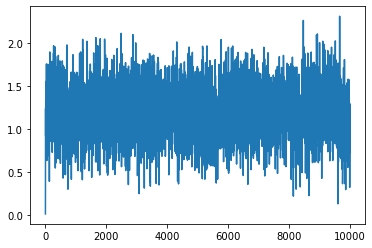

In [149]:
# Plot the chain to see how well it converges.
plt.plot(xs)

# plt.savefig("utfall_konv_ex_1.pdf", bbox_inches='tight')

plt.show()

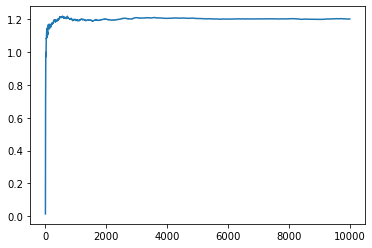

In [150]:
# Another useful diagnostic is the running mean. Ideally, this should
# converge around a single value towards the second half of the run.
sample_mean = np.cumsum(xs) / np.arange(1, n_samples + 1)
plt.plot(sample_mean)

# plt.savefig("cum_sum_konv_ex_1.pdf", bbox_inches='tight')

plt.show()

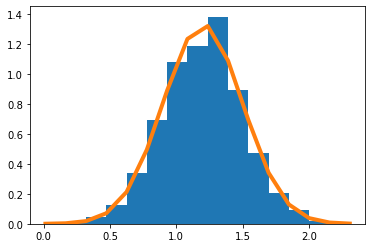

In [151]:
# Plot the histogram and pdf on a grid.
grid = np.linspace(np.min(xs), np.max(xs), 16)

# If the target pdf is not normalized (as for the sine and bimodal pdfs above),
# we need a crude estimate of the normalizing constant to plot it correctly (see
# previous lecture).
spacing = grid[1] - grid[0]
constant_est = spacing * np.sum(target_pdf(grid))

plt.hist(xs, grid, density=True)
plt.plot(grid, target_pdf(grid) / constant_est, linewidth=4)

# plt.savefig("hist_konv_ex_1.pdf", bbox_inches='tight')

plt.show()

In [152]:
# The initial samples can have a strong dependence on the starting value and are
# therefore “contaminated.” A common approach is therefore to discard the first
# half of the run (normally termed “burn-in” or “warm-up” period) and only keep the
# second half of the chain.
xs_split = xs[n_samples // 2:]

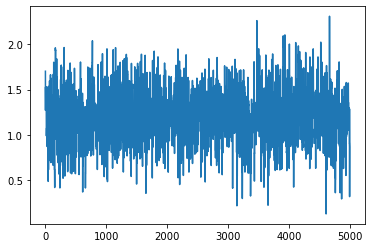

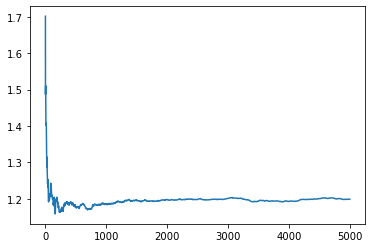

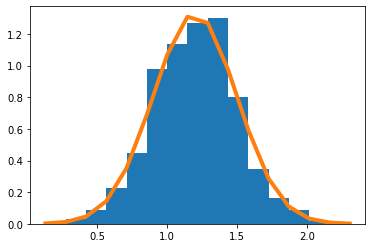

In [153]:
# Plot the samples, running means, and histogram for the split chain.
plt.plot(xs_split)
# plt.savefig("utfall_konv_split_ex_1.pdf", bbox_inches='tight')
plt.show()

sample_mean = np.cumsum(xs_split) / np.arange(1, n_samples // 2 + 1)
plt.plot(sample_mean)
# plt.savefig("cum_sum_konv_split_ex_1.pdf", bbox_inches='tight')
plt.show()

grid = np.linspace(np.min(xs_split), np.max(xs_split), 16)

plt.hist(xs_split, grid, density=True)
plt.plot(grid, target_pdf(grid), linewidth=4)
# plt.savefig("hist_konv_split_ex_1.pdf", bbox_inches='tight')
plt.show()

In [154]:
# Check the sample mean and standard deviation. These should be close to the
# expectation and standard deviation for the target pdf (for the normal pdf,
# we have mean 1.2 and standard deviation 0.3).
np.mean(xs_split), np.std(xs_split, ddof = 1)

(1.1986348312015278, 0.29680678146218753)

#### Fler kedjor

In [155]:
# A good way to diagnose convergence is to run multiple chains simultaneously and
# observe their behavior. Once they start “mixing”, that is, cover the same range
# of values, we can expect that the chains have more or less converged to their
# stationary distribution (which equals the target distribution by construction).
n_chains = 4
n_samples = int(1e4)

δ = 1

# Allocate an array to hold the samples for all the chains.
xs = np.zeros((n_samples, n_chains))

# Need to assign multiple starting points. Here it is good to choose a distribution
# gives relatively spread-out starting points. This helps make it obvious when the
# chains have mixed and when they are still dependent on the starting points.
xs[0] = stats.cauchy.rvs(size=n_chains, scale=0.1)
for i in range(n_samples - 1):
    for j in range(n_chains):
        last = xs[i, j]
        proposal = last + stats.uniform.rvs(loc=-δ, scale=2 * δ)

        r = target_pdf(proposal) / target_pdf(last)

        u = stats.uniform.rvs()

        if u <= min(1, r):
            xs[i + 1, j] = proposal
        else:
            xs[i + 1, j] = last

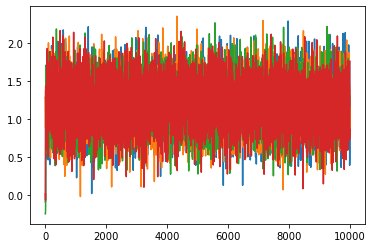

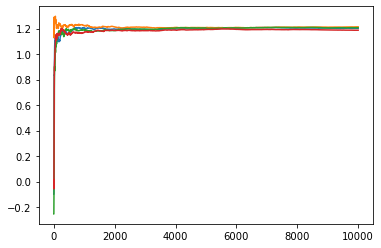

In [156]:
# Plot the samples and running means for the different chains.
plt.plot(xs)
# plt.savefig("utfall_fler_konv_ex_1.pdf", bbox_inches='tight')
plt.show()

# Note: need to calculate separately for each chain.
sample_means = np.cumsum(xs, axis=0) / np.arange(1, n_samples + 1)[:, np.newaxis]
plt.plot(sample_means)
# plt.savefig("cum_sum_fler_konv_ex_1.pdf", bbox_inches='tight')
plt.show()

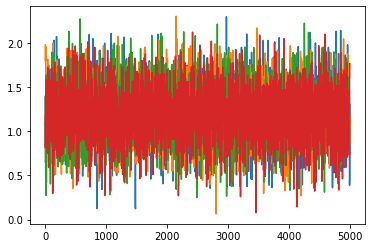

In [157]:
# As before, we want to split the chains to eliminate the burn-in period.
xs_split = xs[n_samples // 2:]

plt.plot(xs_split)
# plt.savefig("utfall_fler_konv_split_ex_1.pdf", bbox_inches='tight')
plt.show()

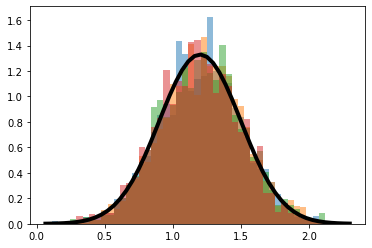

In [158]:
# We can also look at the histograms for the different chains to see how
# well they line up.
grid = np.linspace(np.min(xs_split), np.max(xs_split))

for j in range(n_chains):
    plt.hist(xs_split[:, j], grid, density=True, alpha=0.5)
plt.plot(grid, target_pdf(grid), linewidth=4, color='black')
# plt.savefig("hist_fler_konv_split_ex_1.pdf", bbox_inches='tight')
plt.show()

In [159]:
# Finally, the means and standard deviations should be similar and align
# with those of the target pdf.
np.mean(xs, axis=0), np.std(xs, axis=0)

(array([1.2017071 , 1.21371241, 1.20712526, 1.1873479 ]),
 array([0.30381482, 0.29938969, 0.30529247, 0.30222526]))

### Exempel 9.7 (Metropolisalgoritmen för simulering med icke-konjugerad apriorifördelning)

In [164]:
# Again, set up the parameters for the Metropolis algorithm and
# allocate space for the samples.
n_samples = int(1e4)
n_chains = 4
δ = 0.1
θs = np.zeros((n_samples, n_chains))

# It's a good idea to start the chains around where we think the
# posterior should be – in this case, close to the MLE, the sample
# mean.
θs[0] = np.mean(data) + stats.cauchy.rvs(size=n_chains, scale=0.1)

for i in range(n_samples - 1):
    for j in range(n_chains):
        last = θs[i, j]
        
        proposal = last + stats.uniform.rvs(loc=-δ, scale=2 * δ)
        
        rho = posterior(proposal) / posterior(last)
        
        u = stats.uniform.rvs()
        
        if u <= rho:
            θs[i + 1, j] = proposal
        else:
            θs[i + 1, j] = last

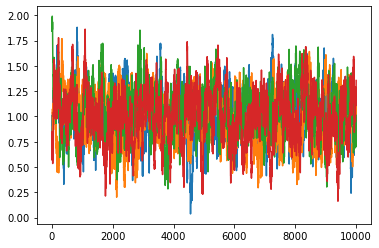

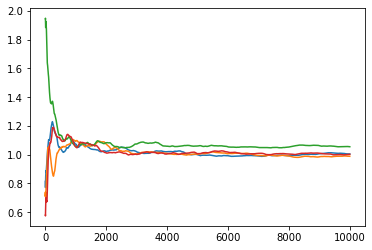

In [165]:
# Look at iterations and running means.
plt.plot(θs)
# plt.savefig("utfall_fler_konv_ex_2.pdf", bbox_inches='tight')

plt.show()

sample_mean = np.cumsum(θs, axis=0) / np.arange(1, n_samples + 1)[:, np.newaxis]
plt.plot(sample_mean)
# plt.savefig("cum_sum_fler_konv_ex_2.pdf", bbox_inches='tight')

plt.show()

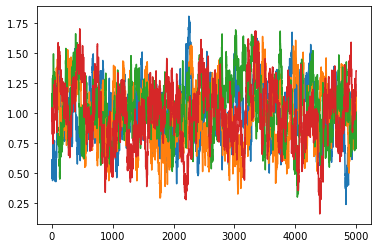

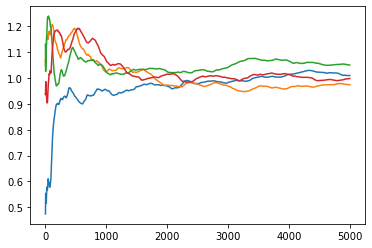

In [166]:
# If we're happy with convergence, split the chains and check the samples and
# running means again.
θs_split = θs[n_samples // 2:]

plt.plot(θs_split)
# plt.savefig("utfall_fler_konv_split_ex_2.pdf", bbox_inches='tight')

plt.show()

sample_mean = np.cumsum(θs_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]
plt.plot(sample_mean)
# plt.savefig("cum_sum_fler_konv_split_ex_2.pdf", bbox_inches='tight')

plt.show()

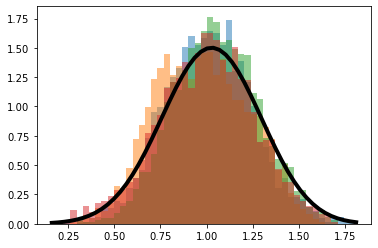

In [167]:
# Now look at the histogram for the split chain. If we've converged, this
# should be close to the pdf of the posterior (after our crude normalization).
grid = np.linspace(np.min(θs_split), np.max(θs_split))

for j in range(n_chains):
    plt.hist(θs_split[:, j], grid, density=True, alpha=0.5)
    
spacing = grid[1] - grid[0]
est_constant = spacing * np.sum(posterior(grid))
plt.plot(grid, posterior(grid) / est_constant, linewidth=4, color='black')
# plt.savefig("hist_fler_konv_split_ex_2.pdf", bbox_inches='tight')

plt.show()

In [168]:
# Get posterior mean, std, 95% credible interval, and posterior
# probability that θ ≤ 0.6.
posterior_mean, posterior_std = np.mean(θs_split), np.std(θs_split)
print(f"{posterior_mean=}, {posterior_std=}")

# Mix all the chains together into one big sample array. Note that the
# total number of samples is therefore n_chains * n_samples // 2.
θs_sorted = sorted(θs_split.flatten())
interval = [θs_sorted[round(0.025 * n_chains * n_samples // 2)], θs_sorted[round(0.975 * n_chains * n_samples // 2)]]
print(f"{interval=}")

posterior_prob = np.mean(θs <= 0.6)
print(f"{posterior_prob=}")

posterior_mean=1.0079238457923183, posterior_std=0.2452630283015564
interval=[0.5265165519233616, 1.4827077480195492]
posterior_prob=0.04985


### Exempel 9.8 (flera parametrar)

In [703]:
Kdata = np.round(stats.beta.rvs(size = 10, a = 4, b = 12), 2)
Edata = np.round(stats.beta.rvs(size = 10, a = 12, b = 4), 2)

print(Kdata)
print(Edata)

[0.16 0.32 0.15 0.27 0.3  0.16 0.36 0.41 0.48 0.28]
[0.8  0.89 0.78 0.68 0.86 0.8  0.85 0.64 0.78 0.81]


In [49]:
Kdata = np.array([0.16, 0.32, 0.15, 0.27, 0.3, 0.16, 0.36, 0.41, 0.48, 0.28])
Edata = np.array([0.8, 0.89, 0.78, 0.68, 0.86, 0.8, 0.85, 0.64, 0.78, 0.81])

We need a prior distribution for the parameters $\alpha$ and $\beta$ in a $\mathrm{Beta}(\alpha, \beta)$ distribution. To get this, we reparameterize the distribution according to its mean $\mu$ and a measure of precision $\kappa$. That is, for $X\sim\mathrm{Beta}(\alpha, \beta)$ we take
$$
\mu = \frac{\alpha}{\alpha + \beta} \qquad \mbox{ och } \kappa = \alpha + \beta + 1.
$$

$\kappa$ is a measure of precision for the distribution since it is inverse-proportional to the variance:
$$
\mathrm{Var}[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = \frac{\mu(1 - \mu)}{\kappa}.
$$

We can then specify a distribution $[\mu, \kappa]^T$ (according to a hierarki) and then transform this distribution back to the parameters $\alpha$ and $\beta$ to get a distribution for $[A, B]^T$.
We take the hierarchical model:
$$
\begin{split}
\kappa | \mu &\sim \mathrm{Gamma}(\theta, \lambda),\\
\mu &\sim \mathrm{U}(0,1)
\end{split}
$$

A transformation of variables gives us the prior distribution on the parameters $\alpha$ and $\beta$:
$$
f_{A, B}(\alpha, \beta) = \frac{\lambda^\theta}{\Gamma(\theta)}(\alpha + \beta + 1)^{\theta - 1}e^{-\lambda(\alpha + \beta + 1)}(\alpha + \beta)^{-1}.
$$

We see that the density function here has a singularity at $[\alpha, \beta]^T = [0,0]^T$ where the value of $f_{A, B}(\alpha, \beta)$ tends towards infinity.  This can be a problem for us if we do not have much data and the prior distribution dominates the posterior.  In particular, the posterior distribution will have a MAP-estimate of $[0,0]^T$ which are parameter values we cannot take!  A good choice of $\theta$ and $\lambda$ can help us avoid this.  Sometimes identifying this choice takes some experimentation.  In this case, $\theta = 3$ and $\lambda = 1$ works:

In [116]:
def log_prior(alpha, beta):
    return np.log(1**3) - loggamma(3) + (3 - 1)*np.log(alpha + beta + 1) - 1*(alpha + beta + 1) - np.log(alpha + beta)

    # Another choice of prior parameters that give a proper posterior not centered a 0
#     return np.log(0.5**25) - loggamma(25) + (25 - 1)*np.log(alpha + beta + 1) - 0.5*(alpha + beta + 1) - np.log(alpha + beta)
    
    # A choice of prior parameters that give a posterior centered a 0:
#     return np.log(30**1) - loggamma(1) + (1 - 1)*np.log(alpha + beta + 1) - 30*(alpha + beta + 1) - np.log(alpha + beta)
    

In [117]:
#check posterior for Kdata:
data = Kdata

def log_posterior(alpha, beta):
    log_p = log_prior(alpha, beta)
    
    for x in data:
        log_p += loggamma(alpha + beta) - loggamma(alpha) - loggamma(beta)
        log_p += (alpha - 1)*np.log(x) + (beta - 1)*np.log(1 - x)
    
    return log_p

In [123]:
alpha_grid = np.linspace(0.1, 10, 100)
beta_grid = np.linspace(0.1, 10, 100)

log_posterior_grid = [[log_posterior(alpha, beta) for alpha in alpha_grid] for beta in beta_grid]

posterior_grid = np.exp(log_posterior_grid - np.max(log_posterior_grid))

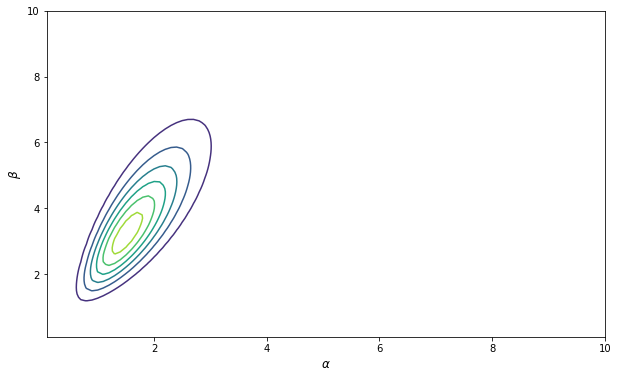

In [124]:
plt.figure(figsize=(10, 6))
plt.contour(alpha_grid, beta_grid, posterior_grid)
plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)

# plt.savefig("cont_multi_markov_K_high_var.pdf", bbox_inches='tight')
plt.show()

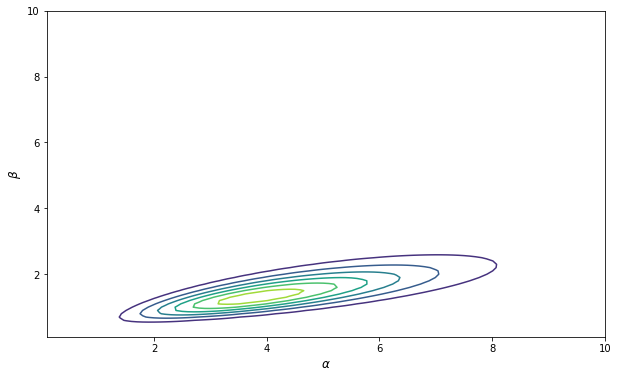

In [125]:
#check posterior for Edata:
data = Edata

def log_posterior(alpha, beta):
    log_p = log_prior(alpha, beta)
    
    for x in data:
        log_p += loggamma(alpha + beta) - loggamma(alpha) - loggamma(beta)
        log_p += (alpha - 1)*np.log(x) + (beta - 1)*np.log(1 - x)
    
    return log_p

alpha_grid = np.linspace(0.1, 10, 100)
beta_grid = np.linspace(0.1, 10, 100)

log_posterior_grid = [[log_posterior(alpha, beta) for alpha in alpha_grid] for beta in beta_grid]

posterior_grid = np.exp(log_posterior_grid - np.max(log_posterior_grid))

plt.figure(figsize=(10, 6))
plt.contour(alpha_grid, beta_grid, posterior_grid)
plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)

# plt.savefig("cont_multi_markov_E_high_var.pdf", bbox_inches='tight')
plt.show()

We need a reasonable candidate for initialization so we take the method of moments estimators for $\alpha$ and $\beta$. (Alternatively, we could use our contour plots to give us a guess for a good starting point.  For example an eyeball estimate for the mode of the plot.)

In [126]:
# method of moments function for beta parameters
def method_moments(list):
    m1 = np.mean(list)
    m2 = np.mean([x**2 for x in list])
    α = (m1*(m1-m2))/(m2-m1**2)
    β = ((m1-m2)*(1-m1))/(m2-m1**2)
    return([α,β])

In [129]:
# MCMC for Kdata:

data = Kdata

n_samples = int(1e4)
n_chains = 4

δ = 0.5

# Store the values of the two parameters in different arrays, to keep
# things simple.
αs = np.zeros((n_samples, n_chains))
βs = np.zeros((n_samples, n_chains))

# Again, we initialize close-ish to the sample mean and sample variance,
# with small perturbations. Since the standard deviation is positive, it's
# easier to add this perturbation in the log domain and then exponentiate.
# This will ensure that the result is positive (and of a similar order of
# magnitude).
init_guess = method_moments(data)
αs[0] = init_guess[0] + np.exp(stats.cauchy.rvs(size=n_chains, scale=0.05))
βs[0] = init_guess[1] + np.exp(stats.cauchy.rvs(size=n_chains, scale=0.05))

for i in range(n_samples - 1):
    for j in range(n_chains):
        last_α = αs[i, j] 
        last_β = βs[i, j]
        
        # The jumping distribution in θ is the same as before, but we define the jump
        # in σ in the log domain for the same reasons as given above. Note that the
        # scale of the jump does not have to be the same in both parameters (and in
        # many cases, this is actually a bad idea). Here, it seems to work, though so
        # we leave it at that.
        proposal_α = np.exp(np.log(last_α) + δ * stats.norm.rvs(size=1))[0]
        proposal_β = np.exp(np.log(last_β) + δ * stats.norm.rvs(size=1))[0]
        
        # Note that the acceptance probability rho is calculated for the *pair* of
        # proposed samples.
        rho = np.exp(log_posterior(proposal_α, proposal_β)) / np.exp(log_posterior(last_α, last_β))
        
        u = stats.uniform.rvs()
        
        # Likewise, the proposal samples are either both accepted or both rejected. This
        # is because they're both part of the same Markov chain. It's just that that
        # Markov chain is two-dimensional (there are two values at any given time t).
        if u <= rho:
            αs[i + 1, j] = proposal_α
            βs[i + 1, j] = proposal_β
        else:
            αs[i + 1, j] = last_α
            βs[i + 1, j] = last_β

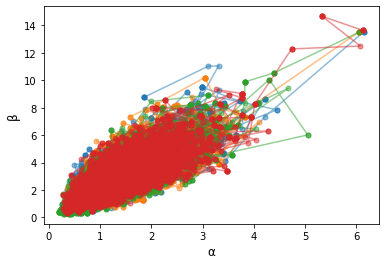

In [130]:
for j in range(n_chains):
    plt.plot(αs[:, j], βs[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('α', fontsize =12)
plt.ylabel('β', fontsize=12)

# plt.savefig("scatter_multi_markov_K_high_var.pdf", bbox_inches='tight')
plt.show()

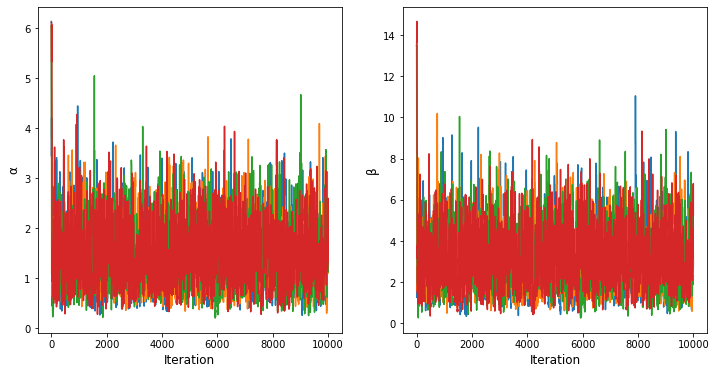

In [131]:
# There are different ways to plot the samples in a multiparameter Markov chain. One
# way is to look at each parameter separately, effectively marginalizing the
# distribution.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(αs)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(βs)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("utfall_multi_markov_K_high_var.pdf", bbox_inches='tight')
plt.show()

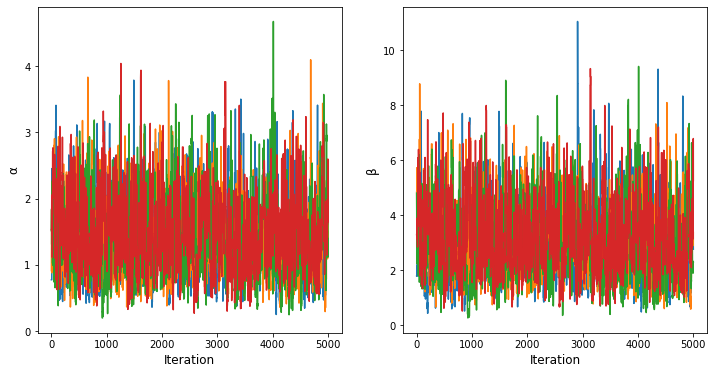

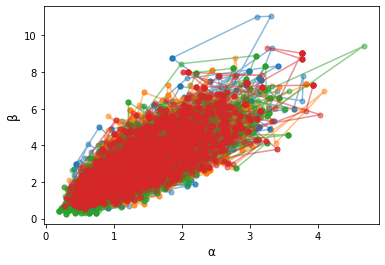

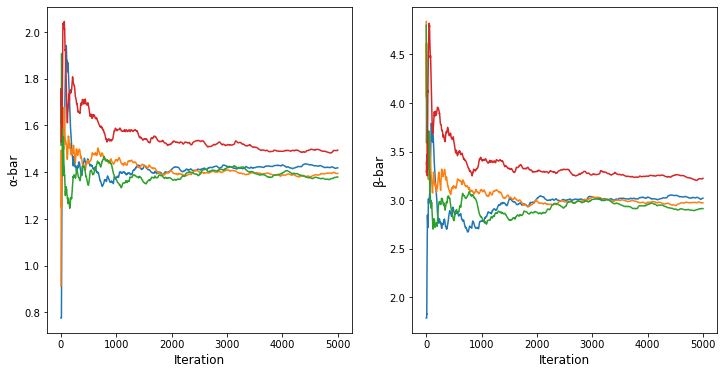

In [132]:
αs_K_split = αs[n_samples // 2:]
βs_K_split = βs[n_samples // 2:]

# We can inspect the samples and running means to convince ourselves
# that we're still happy with the samples.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(αs_K_split)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(βs_K_split)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("utfall_multi_markov_K_split_high_var.pdf", bbox_inches='tight')
plt.show()

for j in range(n_chains):
    plt.plot(αs_K_split[:, j], βs_K_split[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('α', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("scatter_multi_markov_K_split_high_var.pdf", bbox_inches='tight')
plt.show()

α_K_sample_mean = np.cumsum(αs_K_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]
β_K_sample_mean = np.cumsum(βs_K_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(α_K_sample_mean)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α-bar', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(β_K_sample_mean)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β-bar', fontsize=12)

# plt.savefig("cum_sum_multi_markov_K_split_high_var.pdf", bbox_inches='tight')
plt.show()

The posterior mean of $[A_K, B_K]$:

In [133]:
α_K_mean = np.mean(αs_K_split)
β_K_mean = np.mean(βs_K_split)
print(f"{α_K_mean=}")
print(f"{β_K_mean=}")

α_K_mean=1.4218125990145203
β_K_mean=3.0325533317039577


looks okay and generally fits the posterior contours above. We do the same for the experimental data:

In [134]:
# MCMC for Edata:

data = Edata

n_samples = int(1e4)
n_chains = 4

δ = 0.5

# Store the values of the two parameters in different arrays, to keep
# things simple.
αs = np.zeros((n_samples, n_chains))
βs = np.zeros((n_samples, n_chains))

# Again, we initialize close-ish to the sample mean and sample variance,
# with small perturbations. Since the standard deviation is positive, it's
# easier to add this perturbation in the log domain and then exponentiate.
# This will ensure that the result is positive (and of a similar order of
# magnitude).
init_guess = method_moments(data)
αs[0] = init_guess[0] + np.exp(stats.cauchy.rvs(size=n_chains, scale=0.05))
βs[0] = init_guess[1] + np.exp(stats.cauchy.rvs(size=n_chains, scale=0.05))

for i in range(n_samples - 1):
    for j in range(n_chains):
        last_α = αs[i, j] 
        last_β = βs[i, j]
        
        # The jumping distribution in θ is the same as before, but we define the jump
        # in σ in the log domain for the same reasons as given above. Note that the
        # scale of the jump does not have to be the same in both parameters (and in
        # many cases, this is actually a bad idea). Here, it seems to work, though so
        # we leave it at that.
        proposal_α = np.exp(np.log(last_α) + δ * stats.norm.rvs(size=1))[0]
        proposal_β = np.exp(np.log(last_β) + δ * stats.norm.rvs(size=1))[0]
        
        # Note that the acceptance probability rho is calculated for the *pair* of
        # proposed samples.
        rho = np.exp(log_posterior(proposal_α, proposal_β)) / np.exp(log_posterior(last_α, last_β))
        
        u = stats.uniform.rvs()
        
        # Likewise, the proposal samples are either both accepted or both rejected. This
        # is because they're both part of the same Markov chain. It's just that that
        # Markov chain is two-dimensional (there are two values at any given time t).
        if u <= rho:
            αs[i + 1, j] = proposal_α
            βs[i + 1, j] = proposal_β
        else:
            αs[i + 1, j] = last_α
            βs[i + 1, j] = last_β

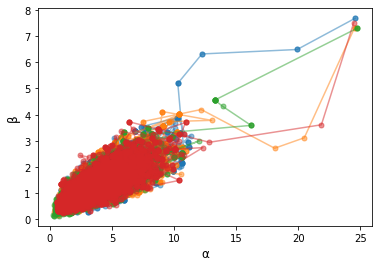

In [135]:
for j in range(n_chains):
    plt.plot(αs[:, j], βs[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('α', fontsize =12)
plt.ylabel('β', fontsize=12)

# plt.savefig("scatter_multi_markov_E_high_var.pdf", bbox_inches='tight')
plt.show()

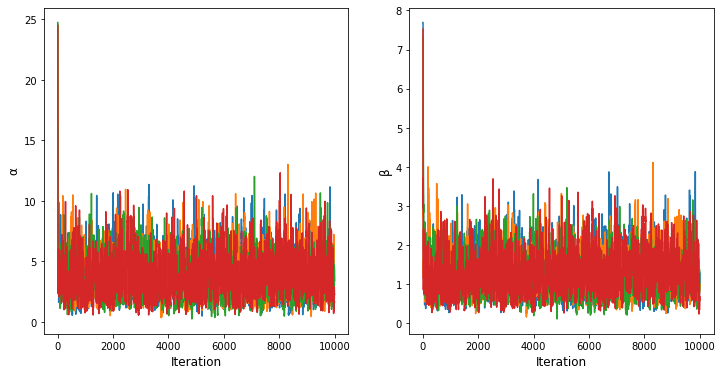

In [136]:
# There are different ways to plot the samples in a multiparameter Markov chain. One
# way is to look at each parameter separately, effectively marginalizing the
# distribution.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(αs)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(βs)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("utfall_multi_markov_E_high_var.pdf", bbox_inches='tight')
plt.show()

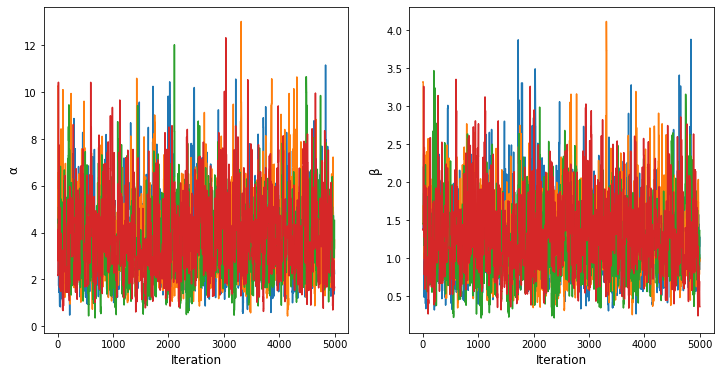

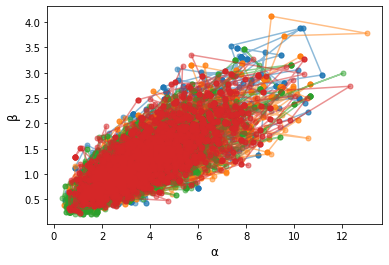

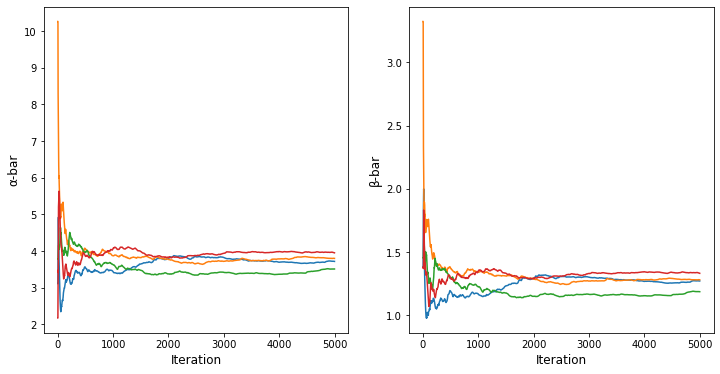

In [137]:
αs_E_split = αs[n_samples // 2:]
βs_E_split = βs[n_samples // 2:]

# We can inspect the samples and running means to convince ourselves
# that we're still happy with the samples.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(αs_E_split)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(βs_E_split)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("utfall_multi_markov_E_split_high_var.pdf", bbox_inches='tight')
plt.show()

for j in range(n_chains):
    plt.plot(αs_E_split[:, j], βs_E_split[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('α', fontsize=12)
plt.ylabel('β', fontsize=12)

# plt.savefig("scatter_multi_markov_E_split_high_var.pdf", bbox_inches='tight')
plt.show()

α_E_sample_mean = np.cumsum(αs_E_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]
β_E_sample_mean = np.cumsum(βs_E_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(α_E_sample_mean)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('α-bar', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(β_E_sample_mean)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('β-bar', fontsize=12)

# plt.savefig("cum_sum_multi_markov_E_split_high_var.pdf", bbox_inches='tight')
plt.show()

The posterior mean of $[A_E, B_E]$:

In [138]:
α_E_mean = np.mean(αs_E_split)
β_E_mean = np.mean(βs_E_split)
print(f"{α_E_mean=}")
print(f"{β_E_mean=}")

α_E_mean=3.7438413565160635
β_E_mean=1.2687252568229455


We can then estimate the posterior predictive average treatment effect with the help of the Law of Total Expectation:

In [146]:
θ_K_mean = np.mean([αs_K_split[i] / (αs_K_split[i] + βs_K_split[i]) for i in range(len(αs_K_split))])
θ_E_mean = np.mean([αs_E_split[i] / (αs_E_split[i] + βs_E_split[i]) for i in range(len(αs_E_split))])
average_treatment_effect = θ_E_mean - θ_K_mean

print(f"{θ_K_mean=}")
print(f"{θ_E_mean=}")
print(f"{average_treatment_effect=}")

θ_K_mean=0.32662986120640364
θ_E_mean=0.7383140504867244
average_treatment_effect=0.41168418928032074


This data supports the conclusion that changing the ad would increase the number of customers who click on it.  Of course, it would be wise to also perform some hypothesis tests to get a sense of the significance of this single result. 

### Exempel 9.9 (Ytterliggande exempel för flera parametrar)

In [79]:
# The Metropolis algorithm works the same way in one or more dimensions.
# We can use this to also estimate the scale parameter σ, which we had
# assumed was known in the previous demo. If we put a noninformative prior
# on σ and keep the normal prior on θ, this is in the conjugate family for
# the likelihood and we get a normal-inverse-gamma posterior (exercise: 
# compute the parameters for this). However, if we replace the normal prior
# on the mean with a t prior, the posterior has no closed form and we must
# approximate it numerically (here with Metropolis).

def noninformative_scale_prior(σ):
    return 1 / σ ** 2

def normal_mean_noninformative_scale_prior(θ, σ):
    return normal_prior(θ) * noninformative_scale_prior(σ)

def t_mean_noninformative_scale_prior(θ, σ):
    return t_prior(θ) * noninformative_scale_prior(σ)

prior = normal_mean_noninformative_scale_prior

We use the same data as in example 9.5 above.

In [80]:
# Parameters used for data generation
θ_true = 0.4
σ = 0.8

n_data = int(50)

# Fix the seed when generating the data so that we get the sama data
# points in each run. This makes it easier to compare.
data = stats.norm.rvs(size=n_data, loc=θ_true, scale=σ, random_state=0)

In [81]:
def likelihood(xs, θ, σ):
    # Equivalent to the definition in example 9.5 but more compact.
    return np.exp(np.sum(stats.norm.logpdf(xs[:, None], loc=θ, scale=σ), axis=0))

In [82]:
def posterior(θ, σ):
    return likelihood(data, θ, σ) * prior(θ, σ)

In [83]:
n_samples = int(1e4)
n_chains = 4

δ = 0.1

# Store the values of the two parameters in different arrays, to keep
# things simple.
θs = np.zeros((n_samples, n_chains))
σs = np.zeros((n_samples, n_chains))

# Again, we initialize close-ish to the sample mean and sample variance,
# with small perturbations. Since the standard deviation is positive, it's
# easier to add this perturbation in the log domain and then exponentiate.
# This will ensure that the result is positive (and of a similar order of
# magnitude).
θs[0] = np.mean(data) + stats.cauchy.rvs(size=n_chains, scale=0.05)
σs[0] = np.exp(np.log(np.std(data)) + stats.cauchy.rvs(size=n_chains, scale=0.05))

for i in range(n_samples - 1):
    for j in range(n_chains):
        last_θ = θs[i, j] 
        last_σ = σs[i, j]
        
        # The jumping distribution in θ is the same as before, but we define the jump
        # in σ in the log domain for the same reasons as given above. Note that the
        # scale of the jump does not have to be the same in both parameters (and in
        # many cases, this is actually a bad idea). Here, it seems to work, though so
        # we leave it at that.
        proposal_θ = last_θ + stats.uniform.rvs(loc=-δ, scale=2 * δ)
        proposal_σ = np.exp(np.log(last_σ) + stats.uniform.rvs(loc=-δ, scale=2 * δ))
        
        # Note that the acceptance probability rho is calculated for the *pair* of
        # proposed samples.
        rho = posterior(proposal_θ, proposal_σ) / posterior(last_θ, last_σ)
        
        u = stats.uniform.rvs()
        
        # Likewise, the proposal samples are either both accepted or both rejected. This
        # is because they're both part of the same Markov chain. It's just that that
        # Markov chain is two-dimensional (there are two values at any given time t).
        if u <= rho:
            θs[i + 1, j] = proposal_θ
            σs[i + 1, j] = proposal_σ
        else:
            θs[i + 1, j] = last_θ
            σs[i + 1, j] = last_σ

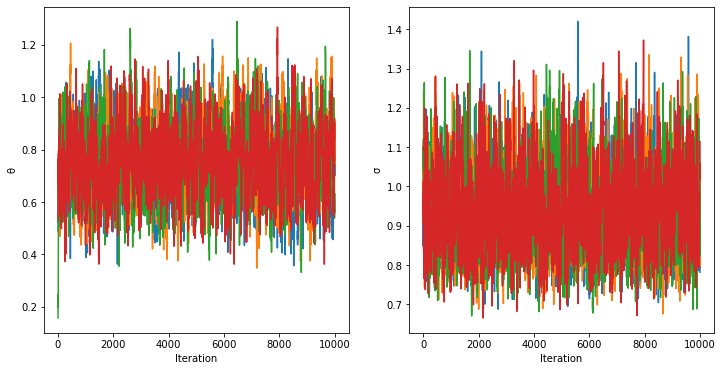

In [84]:
# There are different ways to plot the samples in a multiparameter Markov chain. One
# way is to look at each parameter separately, effectively marginalizing the
# distribution.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(θs)
plt.xlabel('Iteration')
plt.ylabel('θ')

plt.subplot(1, 2, 2)
plt.plot(σs)
plt.xlabel('Iteration')
plt.ylabel('σ')
plt.show()

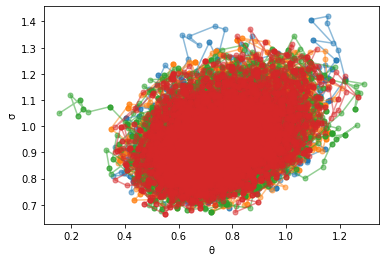

In [85]:
# Another is a 2D (or 3D) scatterplot with lines connecting the samples.
for j in range(n_chains):
    plt.plot(θs[:, j], σs[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('θ')
plt.ylabel('σ')
plt.show()

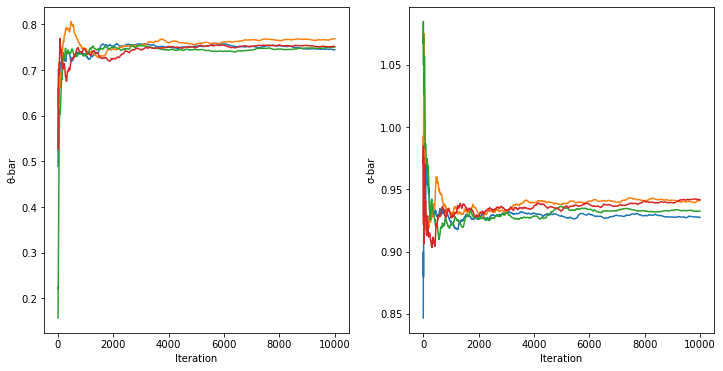

In [86]:
# As before, we can also track the running means for each parameter.
θ_sample_mean = np.cumsum(θs, axis=0) / np.arange(1, n_samples + 1)[:, np.newaxis]
σ_sample_mean = np.cumsum(σs, axis=0) / np.arange(1, n_samples + 1)[:, np.newaxis]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(θ_sample_mean)
plt.xlabel('Iteration')
plt.ylabel('θ-bar')

plt.subplot(1, 2, 2)
plt.plot(σ_sample_mean)
plt.xlabel('Iteration')
plt.ylabel('σ-bar')

plt.show()

In [87]:
# And as before, if we're happy with convergence, we want to split the
# chain, only retaining the last half of the samples.
θs_split = θs[n_samples // 2:]
σs_split = σs[n_samples // 2:]

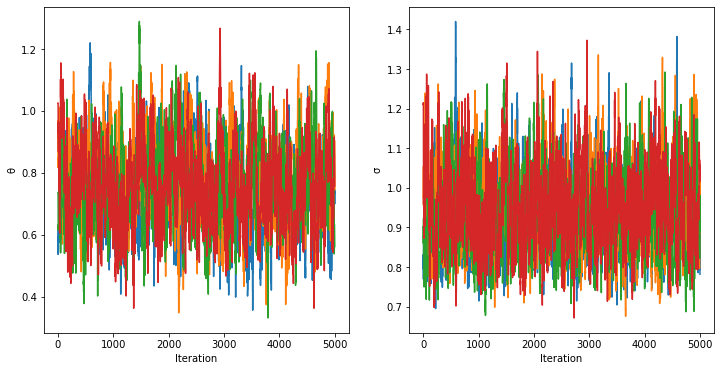

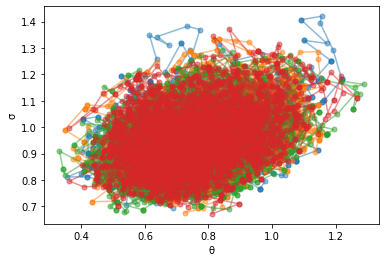

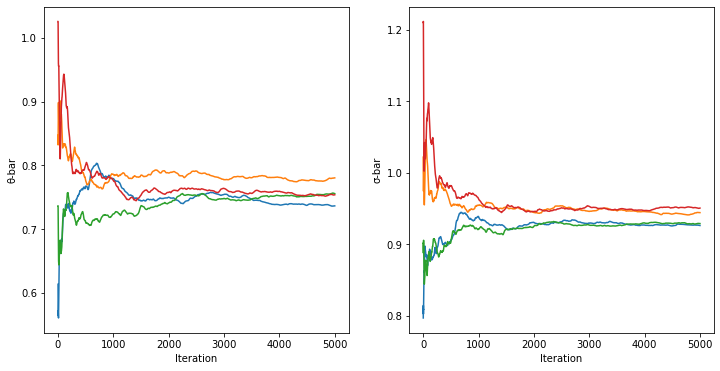

In [88]:
# We can inspect the samples and running means to convince ourselves
# that we're still happy with the samples.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(θs_split)
plt.xlabel('Iteration')
plt.ylabel('θ')

plt.subplot(1, 2, 2)
plt.plot(σs_split)
plt.xlabel('Iteration')
plt.ylabel('σ')

plt.show()

for j in range(n_chains):
    plt.plot(θs_split[:, j], σs_split[:, j], '.-', markersize=10, alpha=0.5)
plt.xlabel('θ')
plt.ylabel('σ')
plt.show()

θ_sample_mean = np.cumsum(θs_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]
σ_sample_mean = np.cumsum(σs_split, axis=0) / np.arange(1, n_samples // 2 + 1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(θ_sample_mean)
plt.xlabel('Iteration')
plt.ylabel('θ-bar')

plt.subplot(1, 2, 2)
plt.plot(σ_sample_mean)
plt.xlabel('Iteration')
plt.ylabel('σ-bar')

plt.show()

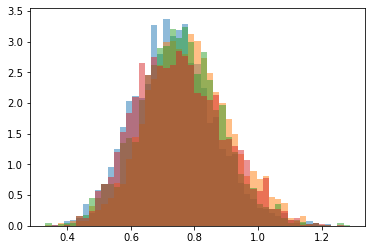

In [89]:
# Finally, we can look at the histogram of each parameter. Since we only look
# at one parameter and “ignore” (or discard) the other, this is equivalent
# to marginalizing the posterior with respect to σ to get the marginal posterior
# for θ.
θ_grid = np.linspace(np.min(θs_split), np.max(θs_split))

for j in range(n_chains):
    plt.hist(θs_split[:, j], θ_grid, density=True, alpha=0.5)
plt.show()

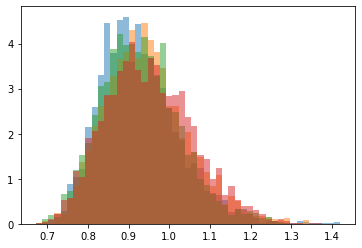

In [90]:
# Similarly, plotting the histogram of σ, ignoring θ, gives us an estimate
# of the marginal posterior for σ.
σ_grid = np.linspace(np.min(σs_split), np.max(σs_split))

for j in range(n_chains):
    plt.hist(σs_split[:, j], σ_grid, density=True, alpha=0.5)
plt.show()

In [91]:
# We can also use these marginal distributions to calculate mean, standard
# deviation, credible intervals, and posterior probabilities.
θ_posterior_mean, θ_posterior_std = np.mean(θs_split), np.std(θs_split)
print(f"{θ_posterior_mean=}, {θ_posterior_std=}")

θs_sorted = sorted(θs_split.flatten())
θ_interval = [θs_sorted[round(0.025 * n_chains * n_samples // 2)], θs_sorted[round(0.975 * n_chains * n_samples // 2)]]
print(f"{θ_interval=}")

θ_posterior_prob = np.mean(θs_split <= 0.6)
print(f"{θ_posterior_prob=}")

θ_posterior_mean=0.7564340520868389, θ_posterior_std=0.13266116256775376
θ_interval=[0.5089539529446173, 1.0322984798916874]
θ_posterior_prob=0.117


In [92]:
# Same for σ.
σ_posterior_mean, σ_posterior_std = np.mean(σs_split), np.std(σs_split)
print(f"{σ_posterior_mean=}, {σ_posterior_std=}")

σs_sorted = sorted(σs_split.flatten())
σ_interval = [σs_sorted[round(0.025 * n_chains * n_samples // 2)], σs_sorted[round(0.975 * n_chains * n_samples // 2)]]
print(f"{σ_interval=}")

σ_posterior_prob = np.mean(σs_split >= 1.0)
print(f"{σ_posterior_prob=}")

σ_posterior_mean=0.9374154264567435, σ_posterior_std=0.10130193978002448
σ_interval=[0.766316670499718, 1.1664416322829836]
σ_posterior_prob=0.24595


In [93]:
# Instead of looking at marginals, however, we can also combine the two parameters
# to calculate other expectations. For example, we can look at the probability that
# the absolute value of θ is greater than σ. In this case, it's not a very
# interesting probability, but the same idea can be applied to other models. For
# example, if we want to compare the group means in a hierarchical model, it suffices
# to compare the samples and look at what proportion satisfies the inequality in
# question.
posterior_prob = np.mean(np.abs(θs_split) > σs_split)
print(f"{posterior_prob=}")

posterior_prob=0.08595
